<a href="https://colab.research.google.com/github/AmenTauhid/AI-Research-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip

replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [ ]:
# All the required imports
import pandas as pd
import pycaret
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
pycaret.__version__

'3.3.2'

In [ ]:
# Loading the dataset
data = pd.read_csv('hour.csv')

# Displaying the first few rows
data.head()

# # Shape of the dataset
# print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# # Summary statistics
# data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Drop unwanted columns
new_data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

#Check for missing values
print(new_data.isnull().sum())

new_data.head()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


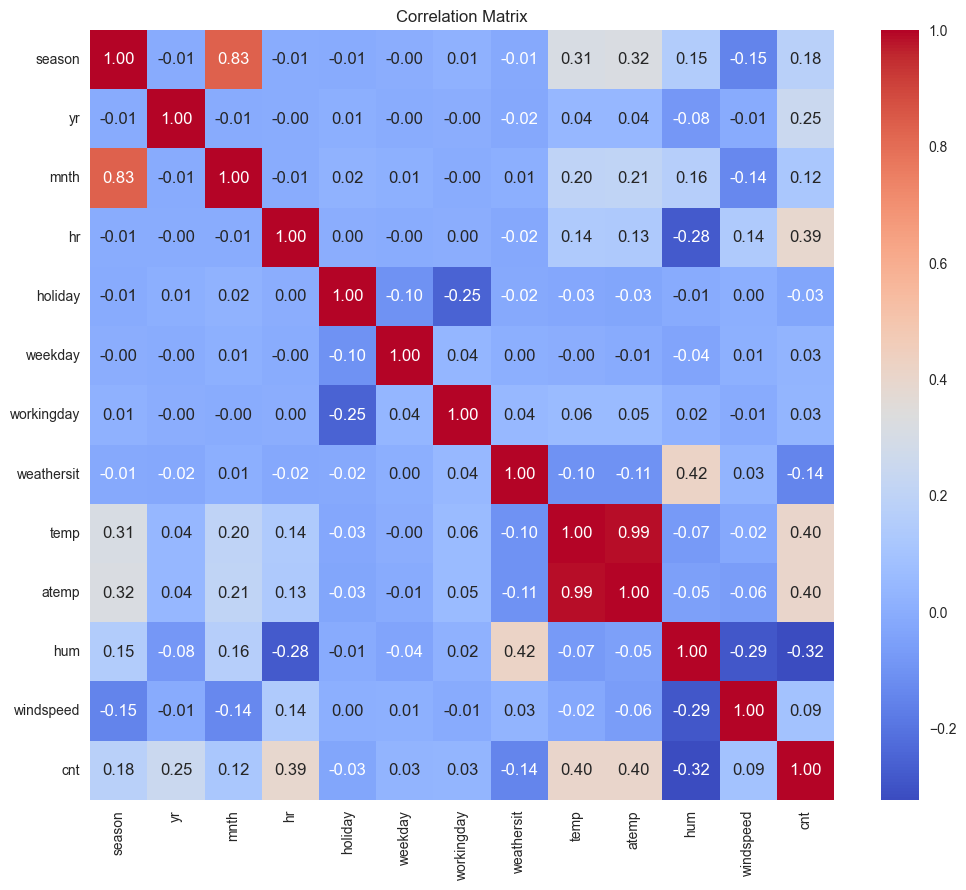

In [ ]:
# Summary statistics
new_data.describe()

# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(new_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Initialize setup
reg_setup = setup(new_data,
        target='cnt',
        session_id=123,
        normalize=True,
        categorical_features=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'],
        numeric_features=['temp', 'atemp', 'hum', 'windspeed'],
        transformation=False)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 13)"
4,Transformed data shape,"(17379, 59)"
5,Transformed train set shape,"(12165, 59)"
6,Transformed test set shape,"(5214, 59)"
7,Numeric features,4
8,Categorical features,8
9,Preprocess,True


In [ ]:
# Compare all models

# sort parameter is used to sort the models based on a metric, in this case RMSE.
best_model = compare_models(sort='RMSE')

# Get model performance metrics
results = pull()
print(results)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,28.3325,2289.4824,47.6539,0.9298,0.3968,0.3901,0.6420
lightgbm,Light Gradient Boosting Machine,31.8388,2300.7627,47.8997,0.9296,0.5453,0.6599,0.5070
rf,Random Forest Regressor,33.1274,2793.7904,52.7593,0.9145,0.4857,0.5691,0.6540
dt,Decision Tree Regressor,44.3468,5743.9342,75.5536,0.8242,0.5840,0.6021,0.0330
knn,K Neighbors Regressor,51.7037,6207.9244,78.7214,0.8096,0.4978,0.5520,0.0410
gbr,Gradient Boosting Regressor,59.4645,6796.0909,82.3773,0.7917,0.8147,1.5180,0.1480
br,Bayesian Ridge,75.1941,10299.3528,101.4522,0.6843,1.0320,2.8862,0.0420
ridge,Ridge Regression,75.2181,10299.8716,101.4548,0.6843,1.0331,2.8941,0.0310
lasso,Lasso Regression,74.8733,10336.4093,101.6348,0.6832,1.0217,2.7856,0.0490
llar,Lasso Least Angle Regression,74.8734,10336.4516,101.6350,0.6832,1.0217,2.7856,0.0270


                                    Model           MAE           MSE  \
et                  Extra Trees Regressor  2.833250e+01  2.289482e+03   
lightgbm  Light Gradient Boosting Machine  3.183880e+01  2.300763e+03   
rf                Random Forest Regressor  3.312740e+01  2.793790e+03   
dt                Decision Tree Regressor  4.434680e+01  5.743934e+03   
knn                 K Neighbors Regressor  5.170370e+01  6.207924e+03   
gbr           Gradient Boosting Regressor  5.946450e+01  6.796091e+03   
br                         Bayesian Ridge  7.519410e+01  1.029935e+04   
ridge                    Ridge Regression  7.521810e+01  1.029987e+04   
lasso                    Lasso Regression  7.487330e+01  1.033641e+04   
llar         Lasso Least Angle Regression  7.487340e+01  1.033645e+04   
huber                     Huber Regressor  7.214140e+01  1.075367e+04   
en                            Elastic Net  7.984690e+01  1.214110e+04   
par          Passive Aggressive Regressor  8.395360

In [ ]:
# List available models
available_models = models()
print(available_models)

# select the best model
best_model = create_model('et')

                                       Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada          

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.2578,2276.4436,47.7121,0.9274,0.3865,0.3760
1,28.2905,2120.4638,46.0485,0.9364,0.4065,0.3921
2,27.9399,2201.2526,46.9175,0.9341,0.4068,0.4214
3,28.3976,2330.7010,48.2773,0.9297,0.3954,0.4331
4,24.7609,1559.3642,39.4888,0.9472,0.3807,0.3646
5,27.0611,2118.0972,46.0228,0.9341,0.3848,0.3558
6,29.9404,2641.1434,51.3921,0.9214,0.4026,0.3886
7,27.1825,2034.8392,45.1092,0.9423,0.3956,0.3851
8,31.1504,3278.0520,57.2543,0.8970,0.4220,0.4074


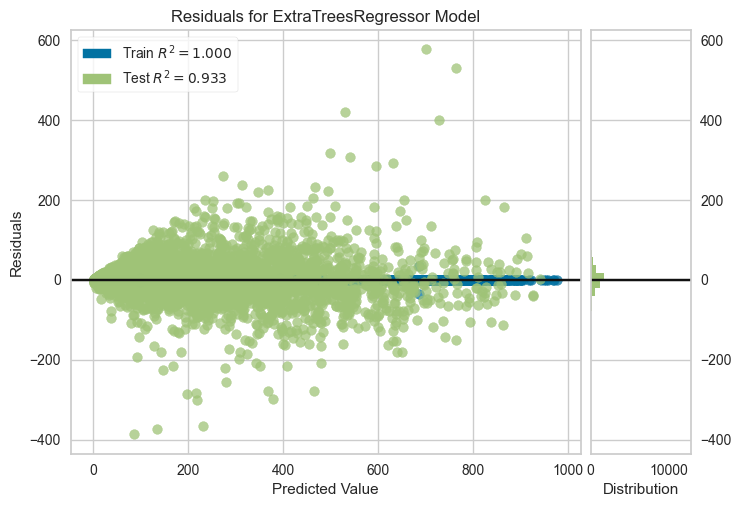

In [ ]:
plot_model(best_model, plot = 'residuals')

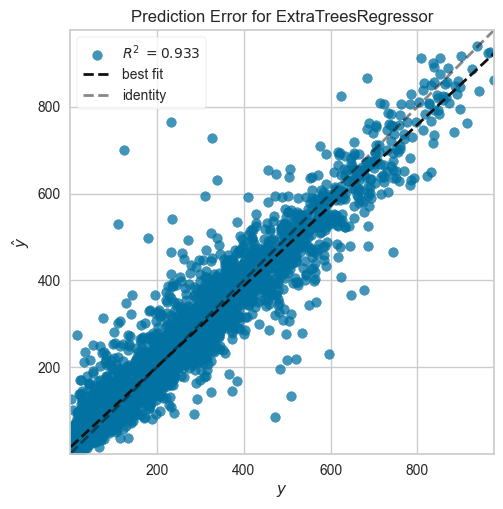

In [ ]:
# plot error
plot_model(best_model, plot = 'error')

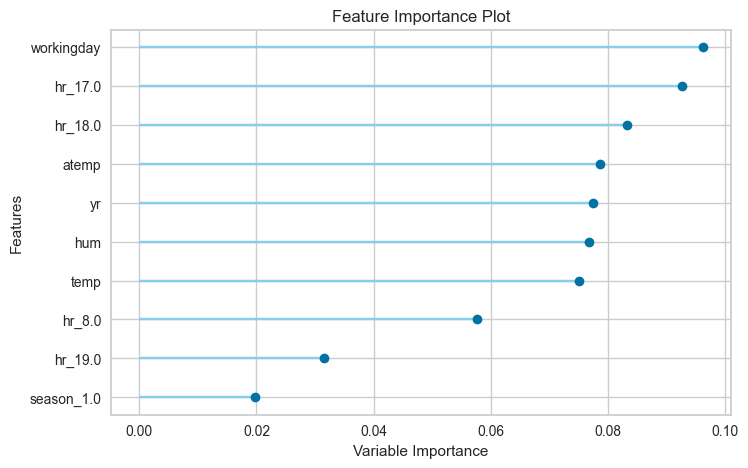

In [ ]:
plot_model(best_model, plot = 'feature')

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# tuned_et = tune_model(best_model)

In [ ]:
et_results = pull()
print(type(et_results))
et_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.2578,2276.4436,47.7121,0.9274,0.3865,0.3760
1,28.2905,2120.4638,46.0485,0.9364,0.4065,0.3921
2,27.9399,2201.2526,46.9175,0.9341,0.4068,0.4214
3,28.3976,2330.7010,48.2773,0.9297,0.3954,0.4331
4,24.7609,1559.3642,39.4888,0.9472,0.3807,0.3646
5,27.0611,2118.0972,46.0228,0.9341,0.3848,0.3558
6,29.9404,2641.1434,51.3921,0.9214,0.4026,0.3886
7,27.1825,2034.8392,45.1092,0.9423,0.3956,0.3851
8,31.1504,3278.0520,57.2543,0.8970,0.4220,0.4074


In [ ]:
# predict on test set
holdout_predictions = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,28.0301,2235.5564,47.2817,0.9331,0.3761,0.3662


In [ ]:
# show predictions
holdout_predictions.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,293.24
7823,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,420.54
15426,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,95.73
15028,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,305.10
12290,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,391.20


In [ ]:
data_no_cnt = new_data.copy()
data_no_cnt = data_no_cnt.drop('cnt', axis=1)
data_no_cnt.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [ ]:
# predict model on data_no_cnt
predictions = predict_model(best_model, data = data_no_cnt)
predictions.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,prediction_label
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.0


In [ ]:
# # save pipeline
# save_model(best_model, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temp', 'atemp', 'hum',
                                              'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_enco...
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['season', 'mnth', 'hr', 'weekday',
                                              'weathersit'],
                                     transformer=OneHotEncoder(cols=['season',
                                                          

In [ ]:
# # load pipeline
# loaded_best_pipeline = load_model('my_first_pipeline')
# loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/z3/qy1k1wcj2dgdxmgnplm7c8pc0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['temp', 'atemp', 'hum',
                                             'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit'],
                                    transformer=S...
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['season', 'mnth', 'hr', 'weekday',
                                             'weathersit'],
                                    transformer=OneHotEncoder(cols=['season',
                                                                    'mnth',
                                                                    'hr',
                                                                    'weekday',
                                                                    'weathersit'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])